In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy 
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [6]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
6,65,1,4,150,236,1,1,105,1,0,?,?,?,3
7,60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
8,60,1,3,120,0,?,0,141,1,2,1,?,?,3
9,60,1,2,160,267,1,1,157,0,0.5,2,?,?,1


In [54]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
190,51,0,4,114.0,258.0,1.0,2,96.0,0.0,1.0,1.0,0
191,62,1,4,160.0,254.0,1.0,1,108.0,1.0,3.0,2.0,1
192,53,1,4,144.0,300.0,1.0,1,128.0,1.0,1.5,2.0,1
193,62,1,4,158.0,170.0,0.0,1,138.0,1.0,0.0,NaN,1
194,46,1,4,134.0,310.0,0.0,0,126.0,0.0,0.0,NaN,1
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,1
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,0
199,62,1,2,120.0,254.0,0.0,2,93.0,1.0,0.0,NaN,1


In [8]:
df.shape

(200, 14)

In [9]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [45]:
col=["trestbps","chol","fbs","thalach","exang","oldpeak","slope","ca","thal"]
df[col]=df[col].apply(pd.to_numeric,errors="coerce",axis=1)

In [46]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [47]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,0.034230,-0.038280,0.210980,0.069138,0.127817,0.002400,-0.174125,0.156823,0.183086,0.148603,NaN,0.176430,0.189692
sex,0.034230,1.000000,0.038036,0.013820,-0.096204,-0.055372,0.060621,-0.001747,0.018155,0.106811,0.124613,NaN,-0.138675,0.098854
cp,-0.038280,0.038036,1.000000,0.097246,0.066279,-0.047701,0.034790,-0.160306,0.235935,0.055933,0.047762,NaN,0.213339,0.256614
trestbps,0.210980,0.013820,0.097246,1.000000,0.176922,0.226024,0.106918,-0.013177,0.222550,0.118022,0.109788,NaN,0.230130,0.096073
chol,0.069138,-0.096204,0.066279,0.176922,1.000000,0.160850,0.025154,-0.048269,0.102016,0.001549,0.080450,NaN,-0.171315,0.019060
fbs,0.127817,-0.055372,-0.047701,0.226024,0.160850,1.000000,0.167657,0.061682,-0.259299,-0.122122,0.023457,NaN,0.059924,0.089535
restecg,0.002400,0.060621,0.034790,0.106918,0.025154,0.167657,1.000000,0.014274,-0.093141,-0.123890,-0.027817,NaN,0.110871,-0.059146
thalach,-0.174125,-0.001747,-0.160306,-0.013177,-0.048269,0.061682,0.014274,1.000000,-0.075057,0.179167,-0.164124,NaN,-0.414599,-0.051548
exang,0.156823,0.018155,0.235935,0.222550,0.102016,-0.259299,-0.093141,-0.075057,1.000000,0.314143,0.149392,NaN,0.258353,0.299270
oldpeak,0.183086,0.106811,0.055933,0.118022,0.001549,-0.122122,-0.123890,0.179167,0.314143,1.000000,0.331319,NaN,0.209410,0.268736


In [49]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [56]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="mean")
list1=["trestbps","chol","thalach","oldpeak"]
for i in list1:
     df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [57]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
list1=["fbs","exang","slope"]
for i in list1:
     df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [58]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

In [50]:
#dropping ca as max values is null
df.drop("ca",inplace=True,axis=1)

In [52]:
df.drop("thal",inplace=True,axis=1)

In [53]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,1
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,0


In [20]:
#replacing 1,2,3,4 value with 1 as it represent the presence of heart disease
df["num"]=df["num"].replace([1,2,3,4],1)

In [ ]:
df['column name'] = df['column name'].replace(['old value'],'new value')

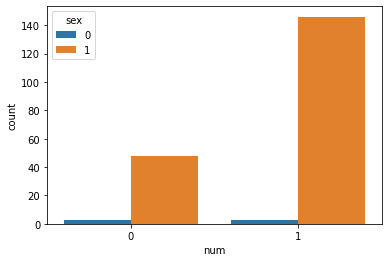

In [21]:
#we can se large number of patients are male and female ,where 0 is femal and 1 is male
sns.countplot(x="num",hue="sex",data=df)

In [22]:
df.num.value_counts()

1    149
0     51
Name: num, dtype: int64

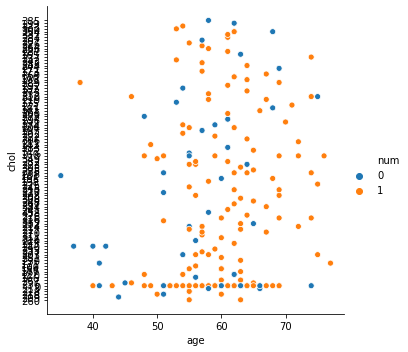

In [29]:
sns.relplot(x="age",y="chol",hue="num",kind="scatter",data=df)

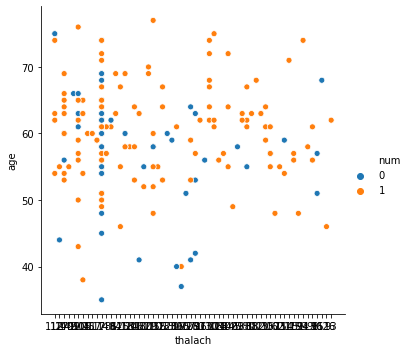

In [42]:
#almost a negativ correlation we can see bw max heart rate and age
sns.relplot(x="thalach",y="age",hue="num",kind="scatter",data=df)

In [44]:
df.skew()

age       -0.404091
sex       -5.552105
cp        -1.648734
restecg    0.391463
num       -1.132724
dtype: float64

In [62]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.680636
restecg     0.391463
thalach     0.148515
exang      -1.102593
oldpeak     0.423414
slope       0.210521
num        -1.132724
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002533D6AC70>,
      dtype=object)

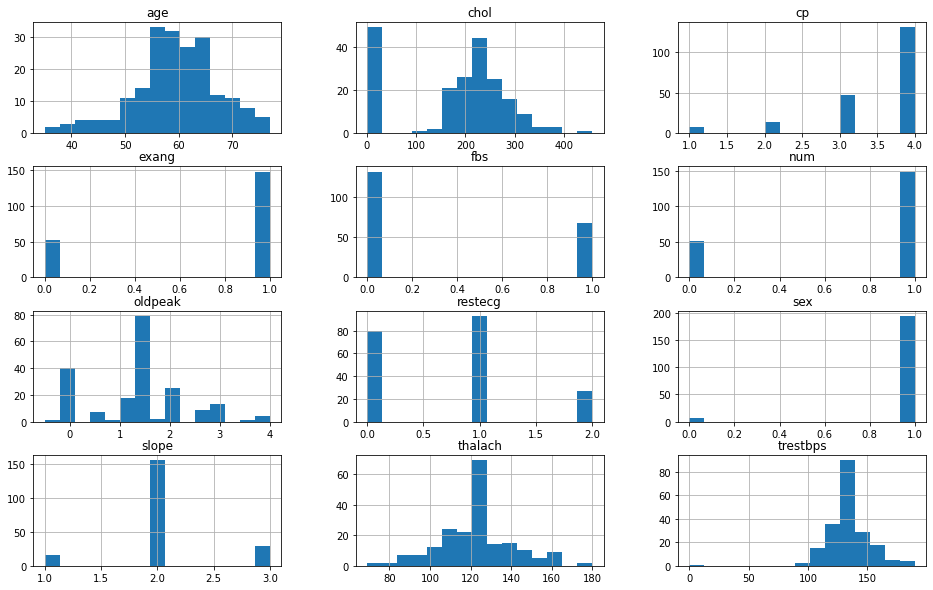

In [60]:
df.hist(figsize=(16,10),bins=15)

age             AxesSubplot(0.125,0.71587;0.133621x0.16413)
sex          AxesSubplot(0.285345,0.71587;0.133621x0.16413)
cp            AxesSubplot(0.44569,0.71587;0.133621x0.16413)
trestbps     AxesSubplot(0.606034,0.71587;0.133621x0.16413)
chol         AxesSubplot(0.766379,0.71587;0.133621x0.16413)
fbs            AxesSubplot(0.125,0.518913;0.133621x0.16413)
restecg     AxesSubplot(0.285345,0.518913;0.133621x0.16413)
thalach      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
exang       AxesSubplot(0.606034,0.518913;0.133621x0.16413)
oldpeak     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
slope          AxesSubplot(0.125,0.321957;0.133621x0.16413)
num         AxesSubplot(0.285345,0.321957;0.133621x0.16413)
dtype: object

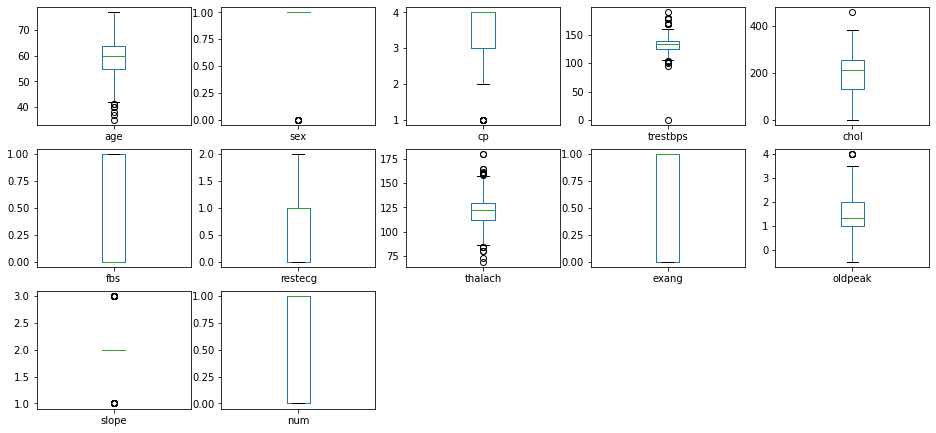

In [64]:
#it will show the outliers 
df.plot(kind="box",subplots=True,layout=(4,5),figsize=(16,10))

In [65]:
import scipy
from scipy.stats import zscore
z_score=abs(zscore(df))
df.shape



(200, 12)

In [66]:
#removing all the outliers
df_final1=df.loc[(abs(zscore(df))<3).all(axis=1)]

In [70]:
#outliers have been removed
df_final1.shape

(181, 12)

In [68]:
#due to outliers skewness has been removed too
df_final1.skew()

age        -0.341400
sex         0.000000
cp         -1.414098
trestbps    0.516323
chol       -0.546859
fbs         0.748785
restecg     0.386145
thalach    -0.064362
exang      -1.207866
oldpeak     0.445245
slope       0.273012
num        -1.243576
dtype: float64

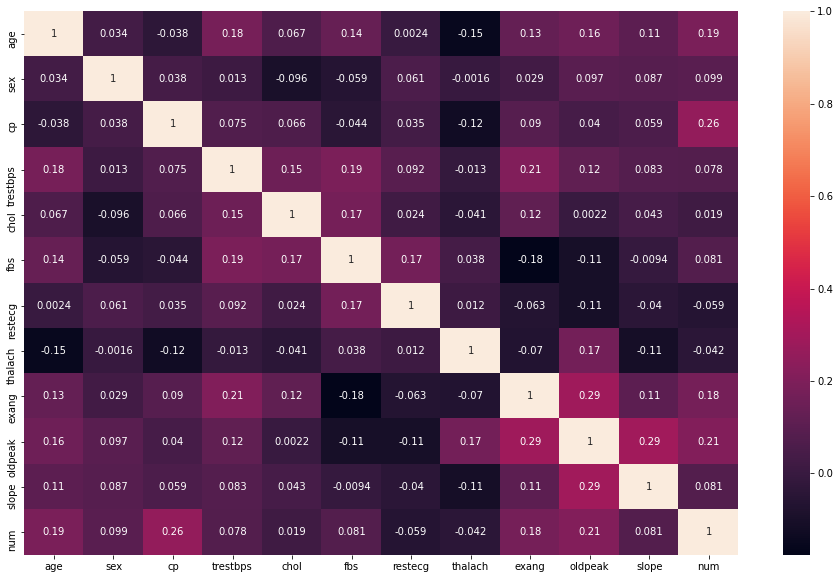

In [71]:
#showing correlation among different varriable

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [72]:
X=df_final1.drop("num",axis=1)

In [73]:
Y=df_final1.num

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [79]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=89,stratify=Y)

In [80]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
ABC=AdaBoostClassifier()
GBC=GradientBoostingClassifier()
RFC=RandomForestClassifier()

In [81]:
model1=[]
model1.append(("KNeighborsClassifier",KNN))
model1.append(("SVC",SV))
model1.append(("DecisionTreeClassifier",DT))
model1.append(("logistic regression",LR))
model1.append(("AdaBoostClassifier",ABC))
model1.append(("GradientBoostingClassifier",GBC))
model1.append(("RandomForestClassifier",RFC))

********************* KNeighborsClassifier ************


KNeighborsClassifier()


accuracy scoore =  0.8


cross validation scr = 0.7839181286549708




classification report               precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.84      0.90      0.87        42

    accuracy                           0.80        55
   macro avg       0.72      0.68      0.70        55
weighted avg       0.79      0.80      0.79        55



[[ 6  7]
 [ 4 38]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)
********************* SVC ************


SVC()


accuracy scoore =  0.7818181818181819


cross validation scr = 0.7564327485380117




classification report               precision    recall  f1-score   support

           0       0.60      0.23      0.33        13
           1       0.80      0.95      0.87        42

    accuracy                           0.78        55
   macro avg       0.70      0.59      0.60        55
we

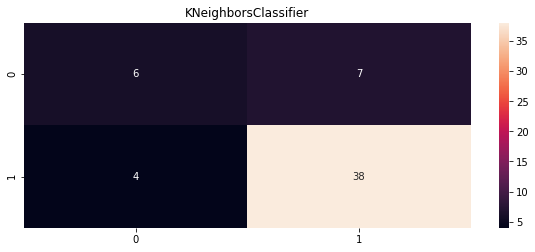

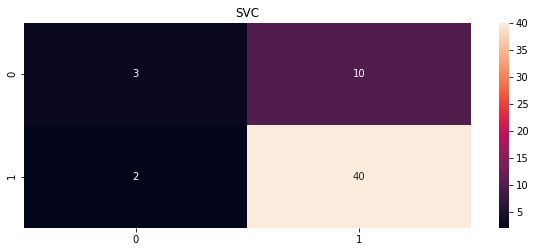

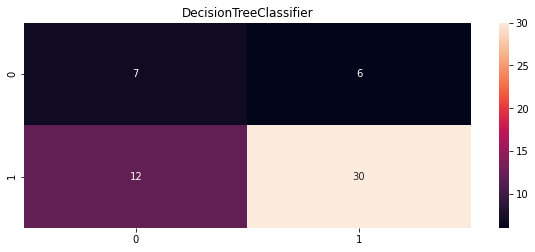

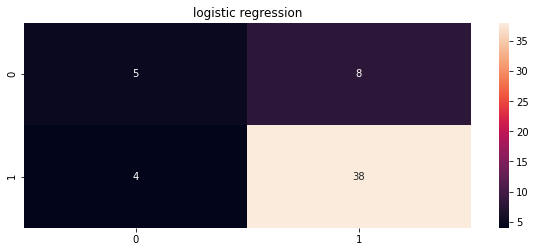

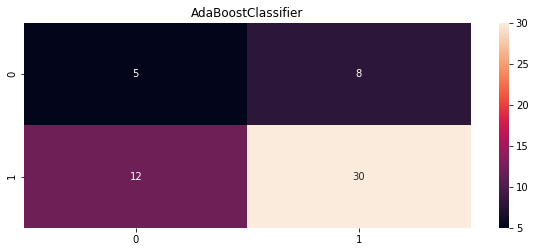

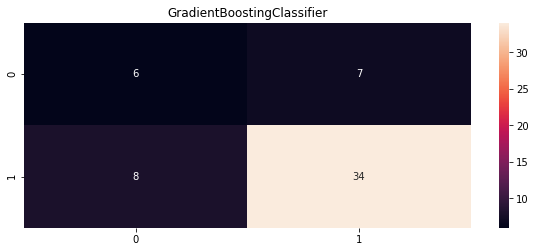

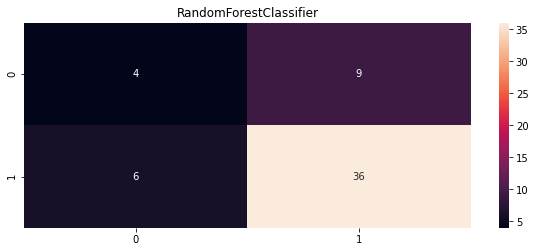

In [82]:
model2=[]
score=[]
cvs=[]
rocscore=[]
for name,md in model1:
    print("*********************",name,"************")
    print("\n")
    model2.append(name)
    md.fit(x_train,y_train)
    print(md)
    y_pred=md.predict(x_test)
    print("\n")
    AS=accuracy_score(y_test,y_pred)
    score.append(AS*100)
    print("accuracy scoore = ",AS)
    print("\n")
    sc=cross_val_score(md,X,Y,cv=10,scoring="accuracy").mean()
    print("cross validation scr =", sc)
    cvs.append(sc*100)
    print("\n")
    
    print("\n")
    print("classification report",classification_report(y_test,y_pred))
    print("\n")
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))


In [84]:
#checking the best parameter for Kneighborsclassifier
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,test_size=0.33,random_state=89)
parameters={"n_neighbors":range(1,25)}
KNN=KNeighborsClassifier()
gs=GridSearchCV(KNN,parameters)
gs.fit(x1_train,y1_train)
gs.best_params_

{'n_neighbors': 8}

In [86]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=89)
KNN=KNeighborsClassifier(n_neighbors=8)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)
accr_scr=accuracy_score(y_test,y_pred)
print("accuracy score :",accr_scr)

accuracy score : 0.8166666666666667


In [88]:
pred_prob=KNN.predict_proba(x_test)[:,1]
pred_prob

array([0.875, 0.875, 0.625, 0.5  , 0.875, 0.625, 0.875, 0.75 , 0.875,
       0.875, 0.625, 0.875, 0.75 , 0.875, 1.   , 0.625, 0.875, 1.   ,
       0.875, 0.875, 0.625, 0.875, 0.75 , 0.75 , 0.75 , 0.625, 0.875,
       0.75 , 0.125, 0.75 , 0.375, 0.875, 0.75 , 0.625, 0.75 , 1.   ,
       0.625, 0.875, 0.875, 0.875, 0.875, 0.75 , 1.   , 0.875, 0.875,
       0.75 , 0.625, 0.875, 0.875, 0.75 , 0.75 , 0.75 , 0.875, 0.875,
       0.75 , 0.75 , 0.5  , 0.75 , 0.875, 1.   ])

In [89]:
fpr,tpr,thresholds=roc_curve(y1_test,pred_prob,pos_label=True)

In [90]:
print(fpr)

[0.         0.         0.18181818 0.63636364 0.81818182 0.90909091
 1.         1.        ]


In [91]:
print(tpr)

[0.         0.10204082 0.57142857 0.81632653 0.95918367 0.97959184
 0.97959184 1.        ]


In [92]:
print(thresholds)

[2.    1.    0.875 0.75  0.625 0.5   0.375 0.125]


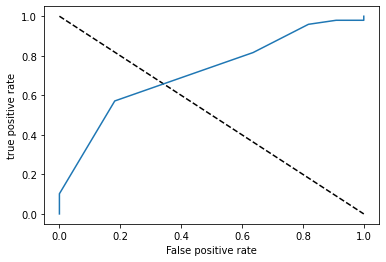

In [93]:
#plotting on graph
plt.plot([0,1],[1,0],"k--")
plt.plot(fpr,tpr,label="KNeighbourClassifier")
plt.xlabel("False positive rate")
plt.ylabel("true positive rate")
plt.show()